<a href="https://colab.research.google.com/github/eagle141004/demo-exp-1/blob/master/learning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('AMQPB0239E_SALES_Document Report.xlsx')

In [ ]:
tally = df['CGST Amount'].value_counts()
print(tally)


CGST Amount
0.00      13
34.20      4
38.07      4
18.99      4
8.46       3
37.17      2
17.01      2
7.56       1
47.52      1
31.32      1
6.03       1
25.56      1
90.61      1
19.44      1
4.27       1
281.17     1
18.18      1
44.91      1
22.14      1
9.45       1
13.86      1
4.32       1
68.58      1
72.36      1
302.45     1
Name: count, dtype: int64


In [ ]:
original_sum = df['CGST Amount'].sum()


tally_sum = sum(tally.index * tally.values)


if original_sum == tally_sum:
    print("Tally data appears to be correct.")
else:
    print("Potential discrepancy in tally data. Further investigation needed.")

Tally data appears to be correct.


Index(['ï»¿"Document Number"', 'Document Type Code', 'Section Name',
       'SubSection Name', 'Type of Export', 'Document Date',
       'Recipient Billing GSTIN', 'Recipient Billing Name', 'Place of Supply',
       'Item Taxable Value',
       ...
       'Vehicle Type', 'PO Reference Number', 'PO reference date',
       'Paid Amount', 'ERP Company Code', 'ERP PLANT Code',
       'ERP Business Place', 'Customer Code', 'Time of Import', 'File Name'],
      dtype='object', length=101)


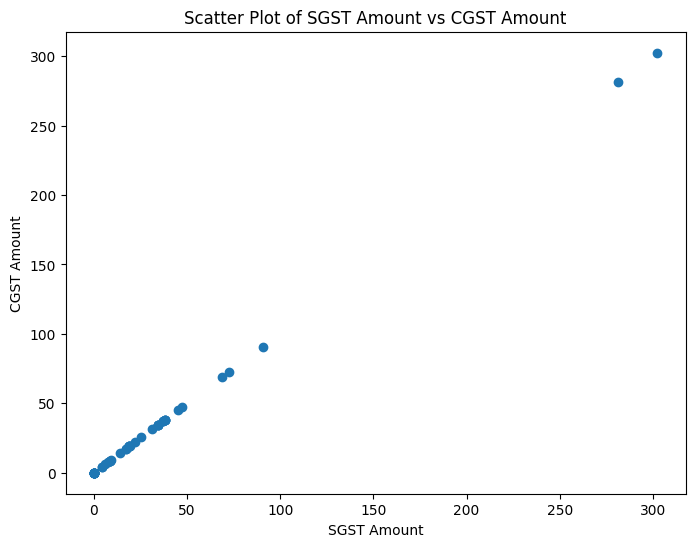

In [ ]:
import matplotlib.pyplot as plt

df = pd.read_excel('AMQPB0239E_SALES_Document Report.xlsx')
print(df.columns)
plt.figure(figsize=(8, 6))
plt.scatter(df['SGST Amount'], df['CGST Amount'])
plt.xlabel('SGST Amount')
plt.ylabel('CGST Amount')
plt.title('Scatter Plot of SGST Amount vs CGST Amount')
plt.show()

In [ ]:
df = pd.read_excel('AMQPB0239E_SALES_Document Report.xlsx')


df['Calculated SGST Rate'] = (df['SGST Amount'] / df['Item Taxable Value']) * 100
df['Calculated CGST Rate'] = (df['CGST Amount'] / df['Item Taxable Value']) * 100


df['SGST 9% Check'] = df['Calculated SGST Rate'].apply(lambda x: abs(x - 9) < 0.01)  # Allowing for slight variations due to rounding
df['CGST 9% Check'] = df['Calculated CGST Rate'].apply(lambda x: abs(x - 9) < 0.01)


inconsistent_rows = df[~(df['SGST 9% Check'] & df['CGST 9% Check'])]

# Print the inconsistent rows
print(inconsistent_rows)

# You can also get a summary of how many rows have inconsistent rates:
sgst_inconsistent_count = len(df[~df['SGST 9% Check']])
cgst_inconsistent_count = len(df[~df['CGST 9% Check']])

print(f"Number of rows with inconsistent SGST rate: {sgst_inconsistent_count}")
print(f"Number of rows with inconsistent CGST rate: {cgst_inconsistent_count}")

   ï»¿"Document Number" Document Type Code Section Name SubSection Name  \
3        SLIS/02/13664'            INVOICE          B2B         REGULAR   
5        SLIS/011/1048'            INVOICE          B2B         REGULAR   
10       SLIS/011/1046'            INVOICE          B2B         REGULAR   
12       SLIS/011/1152'            INVOICE          B2B         REGULAR   
14       SLIS/02/13424'            INVOICE          B2B         REGULAR   
17       SLIS/02/13875'            INVOICE          B2B         REGULAR   
24       SLIS/011/1150'            INVOICE          B2B         REGULAR   
27       SLIS/011/1007'            INVOICE          B2B         REGULAR   
32       SLIS/011/1164'            INVOICE          B2B         REGULAR   
33     SLIS/0205/13549'            INVOICE          B2B         REGULAR   
42       SLIS/02/13832'            INVOICE          B2B         REGULAR   
46      SLIS/021/13294'            INVOICE          B2B         REGULAR   
49        SLIS/011/623'  

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is in a column named 'CGST Amount' in your Excel file
df = pd.read_excel('AMQPB0239E_SALES_Document Report.xlsx')
data = df['Item Taxable Value']

plt.hist(data, bins=10)
plt.xlabel('Item Taxable Value')
plt.ylabel('Frequency')
plt.title('Histogram of CGST Amount')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'AMQPB0239E_SALES_Document Report.xlsx'

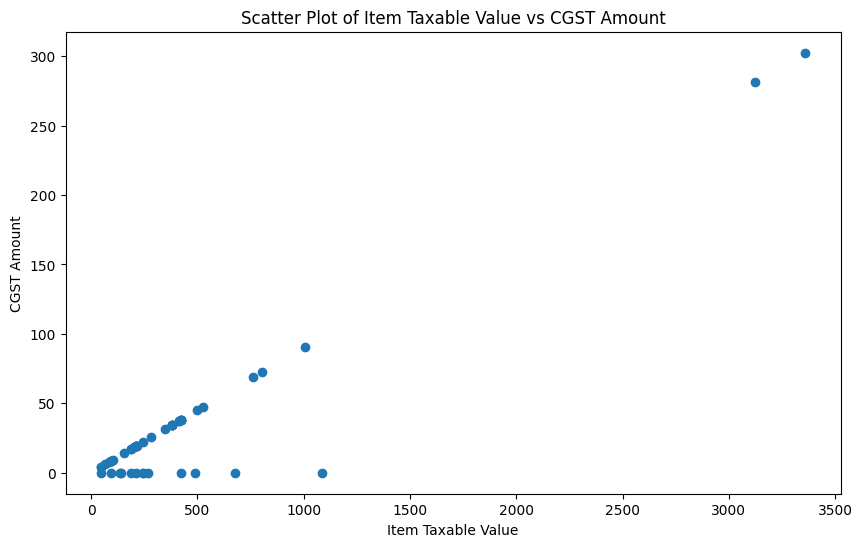

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_excel('AMQPB0239E_SALES_Document Report.xlsx')
plt.figure(figsize=(10, 6))
plt .scatter(df['Item Taxable Value'], df['CGST Amount'])
plt.xlabel('Item Taxable Value')
plt.ylabel('CGST Amount')
plt.title('Scatter Plot of Item Taxable Value vs CGST Amount')
plt.show()

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

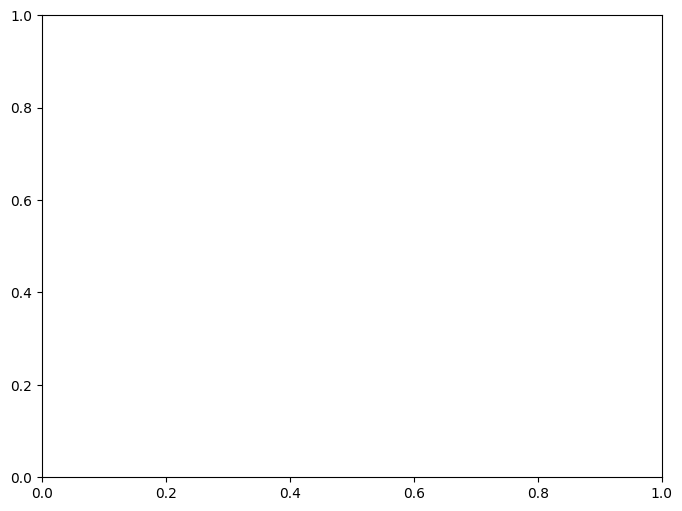

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel('AMQPB0239E_SALES_Document Report.xlsx')  # Assuming your data is in 'my_data.csv'
plt.figure(figsize=(8, 6))
plt.boxplot(df['Place of Supply'])  # Assuming 'Sales' is the column you want to visualize
plt.ylabel('Place of Supply')
plt.title('Box Plot of Place of Supply')
plt.show()

AttributeError: 'Index' object has no attribute 'categories'

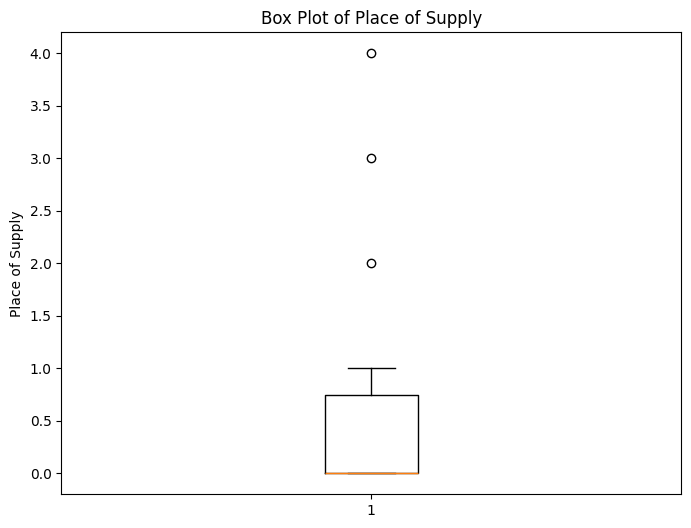

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel('AMQPB0239E_SALES_Document Report.xlsx')  # Assuming your data is in 'my_data.csv'
plt.figure(figsize=(8, 6))

# Convert 'Place of Supply' to numerical representation using pd.factorize()
# This assigns a unique numerical value to each unique category in the column
numerical_place_of_supply, _ = pd.factorize(df['Place of Supply'])

plt.boxplot(numerical_place_of_supply)  # Now plot the numerical representation
plt.ylabel('Place of Supply')
plt.title('Box Plot of Place of Supply')

# Set x-axis tick labels to original categories
plt.xticks(range(1, len(_.categories) + 1), _.categories, rotation=45, ha='right')  # Rotate labels for better readability if needed

plt.show()